In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
(188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

tab20 = [tuple([float(c)/255.0 for c in t]) for t in tableau20]

In [3]:
pruning='0.3'

In [4]:
bud_df = pd.read_csv('/Users/joelforster/Projects/optidb/clus/opti-bud.csv',names=['e','n','bud_number','size','bud_percentage','mean_budtime'])
net_df = pd.read_csv('/Users/joelforster/Projects/optidb/clus/opti-net'+pruning+'.csv',header=0)




IOError: File /Users/joelforster/Projects/optidb/clus/opti-bud.csv does not exist

In [10]:
len(net_df.columns.values.tolist())

22

In [11]:
cols = [x for i,x in enumerate(net_df.columns.values.tolist()) if i!=2 and i<18]

In [12]:
net_df = net_df.drop_duplicates(cols)

In [13]:
for c in bud_df.columns:
    bud_df[c] = bud_df[c].astype(float)
for c in net_df.columns:
    net_df[c] = net_df[c].astype(float)

In [14]:
# net_df.head(5)

In [15]:
criticalRegion = bud_df.query('bud_percentage > 0.2 & bud_percentage < 0.8 & e*n < 320')[['e','n']].values.tolist()
criticalNets = pd.DataFrame(columns=net_df.columns)
for c in criticalRegion:
    runNets = net_df[(net_df['Mean Affinity']==c[1]) & (net_df['Ligand Number']==c[0])]
    criticalNets = criticalNets.append(runNets)

In [16]:
print criticalRegion

[[20.0, 13.0], [20.0, 14.0], [21.0, 12.0], [21.0, 13.0], [21.0, 14.0], [22.0, 12.0], [22.0, 13.0], [22.0, 14.0], [23.0, 10.0], [23.0, 11.0], [23.0, 12.0], [23.0, 13.0], [24.0, 10.0], [24.0, 11.0], [24.0, 12.0], [24.0, 13.0], [25.0, 9.0], [25.0, 10.0], [25.0, 11.0], [25.0, 12.0], [26.0, 9.0], [26.0, 10.0], [26.0, 11.0], [27.0, 9.0], [27.0, 10.0], [28.0, 9.0], [28.0, 10.0], [29.0, 8.0], [29.0, 9.0], [30.0, 8.0], [30.0, 9.0], [31.0, 7.0], [31.0, 8.0], [32.0, 7.0], [32.0, 8.0], [33.0, 7.0], [33.0, 8.0], [34.0, 7.0], [35.0, 6.0], [35.0, 7.0], [36.0, 6.0], [37.0, 6.0], [38.0, 6.0], [39.0, 6.0], [40.0, 6.0], [42.0, 5.0], [43.0, 5.0], [44.0, 5.0], [45.0, 5.0], [46.0, 5.0], [50.0, 4.0], [51.0, 4.0], [52.0, 4.0], [53.0, 4.0], [54.0, 4.0]]


In [17]:
net_df

,Ligand Number,Mean Affinity,Fitness,Mean Budding Time,Budding Rate,Density,Max Diameter,Mean Diameter,Min Diameter,Min Radius,...,Max Radius,Max Average Shortest Path,Mean Average Shortest Path,Min Average Shortest Path,Subgraph Number,Estrada Coefficient,Pruning,Max SmallWorld,Mean SmallWorld,Min SmallWorld
0,21.0,10.0,171.000000,-1.000000,0.00,0.161905,4.0,3.000000,2.0,1.0,...,2.0,1.750000,1.583333,1.333333,3.0,147.772305,0.3,2.319479,1.523568,1.031342
1,21.0,10.0,166.250000,-1.000000,0.00,0.161905,5.0,2.333333,0.0,0.0,...,3.0,2.425000,1.252778,0.000000,3.0,125.185089,0.3,2.309060,0.769687,0.000000
2,21.0,10.0,227.991228,22800.000000,0.25,0.128571,7.0,3.000000,1.0,1.0,...,4.0,3.044118,1.681373,1.000000,3.0,96.369285,0.3,1.816845,0.605615,0.000000
3,21.0,10.0,167.000000,-1.000000,0.00,0.161905,10.0,10.000000,10.0,5.0,...,5.0,4.138095,4.138095,4.138095,1.0,145.480862,0.3,2.155599,2.155599,2.155599
4,21.0,10.0,207.750000,-1.000000,0.00,0.123810,7.0,3.000000,0.0,0.0,...,5.0,3.191176,1.508170,0.000000,3.0,79.684674,0.3,3.353519,1.117840,0.000000
5,21.0,10.0,164.250000,-1.000000,0.00,0.133333,11.0,11.000000,11.0,6.0,...,6.0,4.538095,4.538095,4.538095,1.0,81.044731,0.3,2.563779,2.563779,2.563779
6,21.0,10.0,167.250000,-1.000000,0.00,0.180952,7.0,7.000000,7.0,4.0,...,4.0,2.842857,2.842857,2.842857,1.0,158.746140,0.3,8.927956,8.927956,8.927956
7,21.0,10.0,105.500000,-1.000000,0.00,0.142857,5.0,4.500000,4.0,3.0,...,3.0,2.214286,2.184066,2.153846,2.0,95.761320,0.3,1.267515,0.633757,0.000000
8,21.0,10.0,192.000000,-1.000000,0.00,0.152381,8.0,8.000000,8.0,4.0,...,4.0,3.614286,3.614286,3.614286,1.0,101.331431,0.3,4.809815,4.809815,4.809815
9,21.0,10.0,163.000000,-1.000000,0.00,0.171429,4.0,3.500000,3.0,2.0,...,2.0,2.000000,1.866667,1.733333,2.0,142.611001,0.3,1.813240,1.385951,0.958662


In [297]:
bud_df = None
net_df = None

In [315]:
budNets = criticalNets[criticalNets['Mean Budding Time'] > 0.0].groupby(['Mean Affinity','Ligand Number']).mean().reset_index()
nonbudNets = criticalNets[criticalNets['Mean Budding Time'] < 0.0].groupby(['Mean Affinity','Ligand Number']).mean().reset_index()

In [336]:
criticalNets

,Ligand Number,Mean Affinity,Fitness,Mean Budding Time,Budding Rate,Density,Max Diameter,Mean Diameter,Min Diameter,Min Radius,...,Max Radius,Max Average Shortest Path,Mean Average Shortest Path,Min Average Shortest Path,Subgraph Number,Estrada Coefficient,Pruning,Max SmallWorld,Mean SmallWorld,Min SmallWorld
358880,20.0,13.0,193.500000,-1.000000,0.00,0.147368,3.0,1.600000,0.0,0.0,...,2.0,1.607143,1.041429,0.000000,5.0,120.391242,0.3,2.119488,0.828588,0.000000
358881,20.0,13.0,233.287879,16500.000000,0.25,0.147368,11.0,11.000000,11.0,6.0,...,6.0,4.184211,4.184211,4.184211,1.0,103.036817,0.3,7.485079,7.485079,7.485079
358882,20.0,13.0,201.750000,-1.000000,0.00,0.178947,9.0,4.500000,0.0,0.0,...,5.0,3.918129,1.959064,0.000000,2.0,132.201142,0.3,7.990154,3.995077,0.000000
358883,20.0,13.0,220.750000,-1.000000,0.00,0.189474,4.0,4.000000,4.0,2.0,...,2.0,2.071429,1.967532,1.863636,2.0,184.421454,0.3,2.669080,2.611171,2.553261
358884,20.0,13.0,185.250000,-1.000000,0.00,0.189474,7.0,2.333333,0.0,0.0,...,4.0,3.065359,1.021786,0.000000,3.0,258.543966,0.3,3.542808,1.180936,0.000000
358885,20.0,13.0,172.750000,-1.000000,0.00,0.147368,10.0,5.500000,1.0,1.0,...,5.0,3.908497,2.454248,1.000000,2.0,103.324527,0.3,2.156676,1.078338,0.000000
358886,20.0,13.0,219.750000,-1.000000,0.00,0.142105,8.0,3.333333,1.0,1.0,...,4.0,3.216667,1.738889,1.000000,3.0,84.972016,0.3,2.834916,0.944972,0.000000
358887,20.0,13.0,241.000000,-1.000000,0.00,0.147368,7.0,3.500000,0.0,0.0,...,5.0,3.280702,1.640351,0.000000,2.0,84.847113,0.3,20.084689,10.042345,0.000000
358888,20.0,13.0,159.750000,-1.000000,0.00,0.136842,11.0,11.000000,11.0,6.0,...,6.0,4.073684,4.073684,4.073684,1.0,73.261312,0.3,0.000000,0.000000,0.000000
358889,20.0,13.0,250.328818,20300.000000,0.25,0.157895,5.0,1.666667,0.0,0.0,...,3.0,2.594771,0.864924,0.000000,3.0,97.406165,0.3,1.970101,0.656700,0.000000


In [18]:
meanBudNets = criticalNets[criticalNets['Mean Budding Time'] > 0.0].groupby(['Ligand Number']).mean().reset_index()
meanNonbudNets = criticalNets[criticalNets['Mean Budding Time'] < 0.0].groupby(['Ligand Number']).mean().reset_index()

248.54545454545453 200.0 312.0 829.4479338842976


/Users/joelforster/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


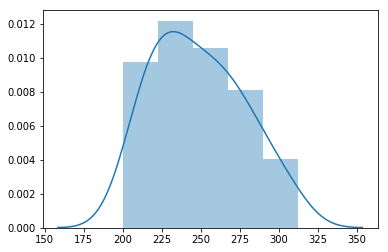

In [19]:
criticalEnergy = map(lambda x: x[0]*x[1],criticalRegion)
ax = sns.distplot(criticalEnergy)
print np.mean(criticalEnergy) , np.min(criticalEnergy), np.max(criticalEnergy),np.var(criticalEnergy)


In [20]:
bins = np.linspace(0, 100, 26)
print bins

digitisedLigandNum = np.digitize(budNets["Ligand Number"], bins)
binnedLigandNum = [budNets["Ligand Number"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]
binnedNonBudLigandNum = [nonbudNets["Ligand Number"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]
binnedBuddingRate = [budNets["Budding Rate"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]

binnedLigandNum = [b for b in binnedLigandNum if not np.isnan(b)]
binnedNonBudLigandNum = [b for b in binnedNonBudLigandNum if not np.isnan(b)]
binnedBuddingRate = [b for b in binnedBuddingRate if not np.isnan(b)]

[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100.]


In [21]:
def buildBinnedPlot(c):
    binnedBudC = [budNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
    binnedBudyErr = [b for b in [np.std(budNets[c][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    binnedBudxErr = [b for b in [np.std(budNets["Ligand Number"][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    binnedBudC = [b for b in binnedBudC if not np.isnan(b)]
    binnedNoBudC = [nonbudNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
    binnedNoBudC = [b for b in binnedNoBudC if not np.isnan(b)]
    binnedNoBudyErr = [b for b in [np.std(nonbudNets[c][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    binnedNoBudxErr = [b for b in [np.std(nonbudNets["Ligand Number"][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    return binnedBudC,binnedBudxErr,binnedBudyErr,binnedNoBudC,binnedNoBudxErr,binnedNoBudyErr

In [22]:
def buildHistPlot(c,n):
    budPop = criticalNets[(criticalNets['Mean Budding Time'] > 0.0)&(criticalNets['Ligand Number']==float(n))][c].values.tolist()
    nonBudPop = criticalNets[(criticalNets['Mean Budding Time'] < 0.0)&(criticalNets['Ligand Number']==float(n))][c].values.tolist()
    return budPop, nonBudPop
    

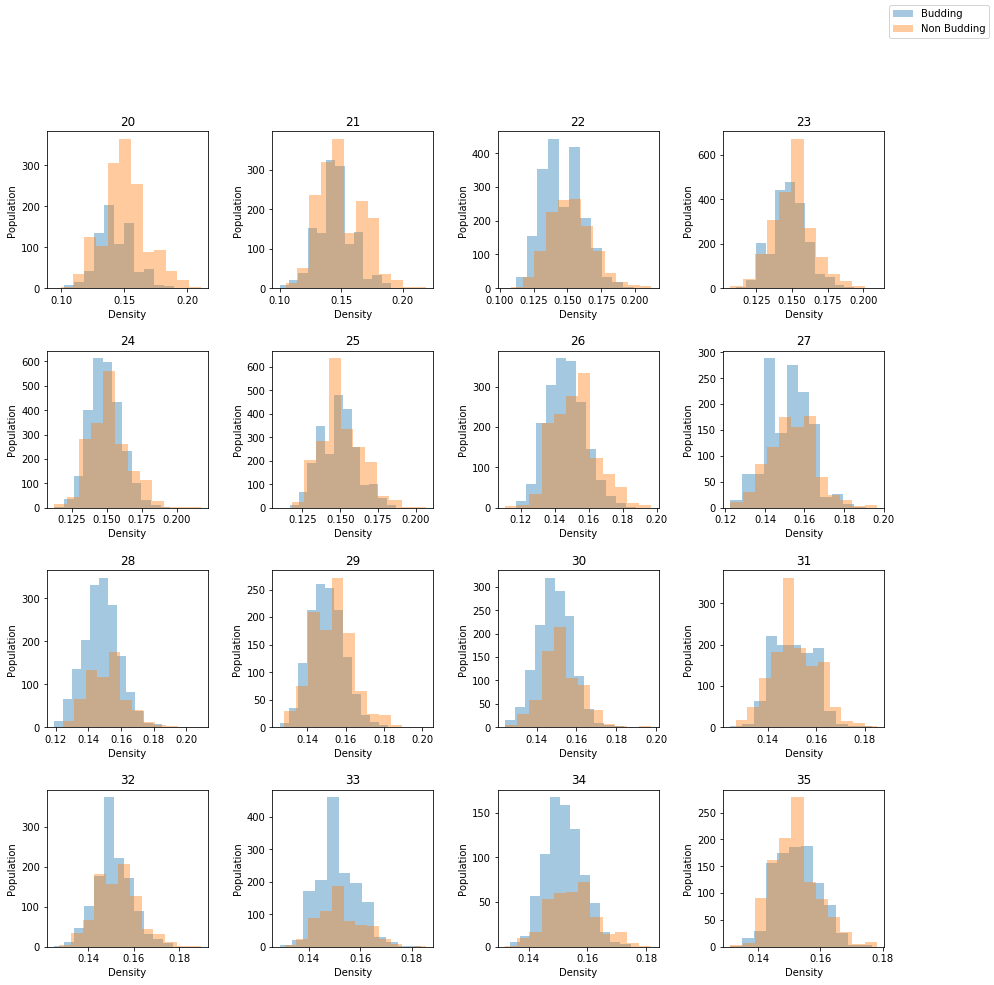

In [23]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
startI = 20
for i in range(startI,startI+16):
    ax = plt.subplot(4, 4, i-startI+1)
    r = buildHistPlot("Density",i)
    ax = sns.distplot(r[0],label="Budding",bins=12,kde=False)
    ax = sns.distplot(r[1],label="Non Budding",bins=12,kde=False)
    ax.set_xlabel("Density")
    ax.set_ylabel("Population")
    ax.set_title(i)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

In [31]:
def bigFig(c,label="NONE"):
    if label=="NONE":
        label = c
    plt.figure(figsize=(12,7.5))
    ax = plt.subplot(111)

    r = [int(np.floor(min(budNets[c])*1000)), int(np.ceil(max(budNets[c])*1000)+1)]
    # for y in range(r[0],r[1]):    
    #     plt.plot(range(r[0],r[1]), [y] * len(range(r[0],r[1])), "--", lw=0.5, color="black", alpha=0.3)

    xr = range(int(np.floor(min(budNets['Ligand Number']))-1), int(np.ceil(max(budNets['Ligand Number']))+2))

    # for y in range(r[0],r[1]):    
    #     plt.plot(xr, [y*0.001] * len(xr) , "--", lw=0.5, color="black", alpha=0.3)    


    r = buildBinnedPlot(c)

#     plt.errorbar(binnedLigandNum,r[0],xerr=r[1],yerr=r[2],fmt='o',label="Budding")
#     plt.errorbar(binnedNonBudLigandNum,r[3],yerr=r[5],xerr=r[4],fmt='o',label="Non Budding")

    plt.errorbar(binnedLigandNum,r[0],fmt='-o',label="Budding")
    
    if np.mean(r[3]) > 0.1:
        plt.errorbar(binnedNonBudLigandNum,r[3],fmt='-o',label="Non Budding")

    yerrbud1 = [e[0]-e[1] for e in  zip(r[0],r[2])]
    yerrbud2 = [e[0]+e[1] for e in  zip(r[0],r[2])]

    yerrnobud1 = [e[0]-e[1] for e in  zip(r[3],r[5])]
    yerrnobud2 = [e[0]+e[1] for e in  zip(r[3],r[5])]

    ax.fill_between(binnedLigandNum,yerrbud1, yerrbud2, where=yerrbud2 >= yerrbud1, facecolor=tab20[1], interpolate=True,alpha=0.5)
    if np.mean(r[3]) > 0.1:
        ax.fill_between(binnedLigandNum,yerrnobud1, yerrnobud2, where=yerrnobud2 >= yerrnobud1, facecolor=tab20[3], interpolate=True,alpha=0.5)


    plt.ylabel(label,fontsize=16)
    plt.xlabel("Ligand Number",fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()   
    plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")  
    plt.legend(loc='lower right',fontsize=12,bbox_to_anchor=(0.9, 0.1))
    plt.savefig('/Users/joelforster/Projects/Figures/eps/'+label+'-LigandNumber.eps', format='eps', dpi=1000)
    plt.savefig('/Users/joelforster/Projects/Figures/png/'+label+'-LigandNumber.png')
    plt.cla()
    plt.clf()

In [33]:
for c in budNets.columns:
    bigFig(c)


/Users/joelforster/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


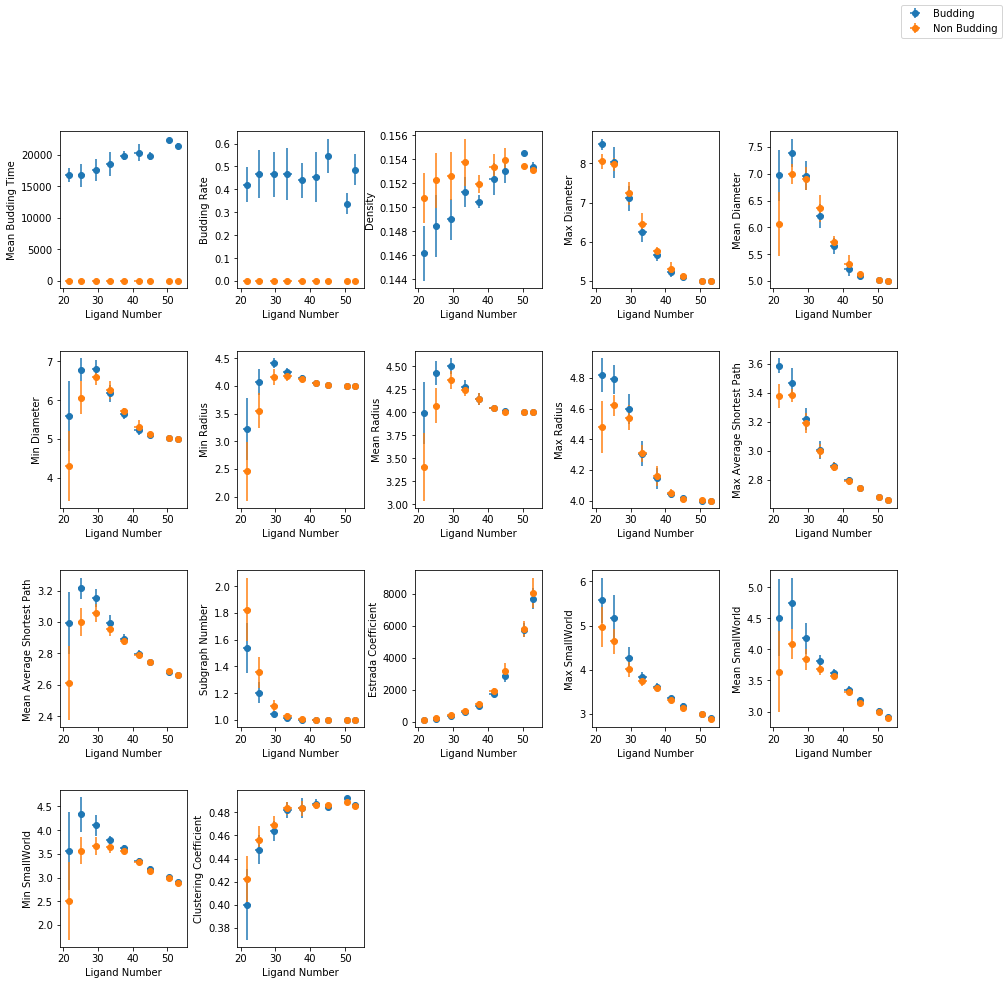

In [27]:
i = 1


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(4, 5, i)
#     binnedBudC = [budNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
#     binnedBudyErr = [b for b in [np.std(budNets[c][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
#     binnedBudxErr = [b for b in [np.std(budNets["Ligand Number"][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
#     binnedBudC = [b for b in binnedBudC if not np.isnan(b)]
#     binnedNoBudC = [nonbudNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
#     binnedNoBudC = [b for b in binnedNoBudC if not np.isnan(b)]
#     binnedNoBudyErr = [b for b in [np.std(nonbudNets[c][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
#     binnedNoBudxErr = [b for b in [np.std(nonbudNets["Ligand Number"][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    r = buildBinnedPlot(c)
    ax.errorbar(binnedLigandNum,r[0],xerr=r[1],yerr=r[2],fmt='o',label="Budding")
    ax.errorbar(binnedNonBudLigandNum,r[3],yerr=r[5],xerr=r[4],fmt='o',label="Non Budding")
    #ax.plot(binnedLigandNum,binnedBudC,'.',label="Budding")
    plt.ylabel(c)
    plt.xlabel("Ligand Number")
    
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

IOError: [Errno 2] No such file or directory: '/Users/joel/Projects/Figures/Density-LigandNumber.eps'

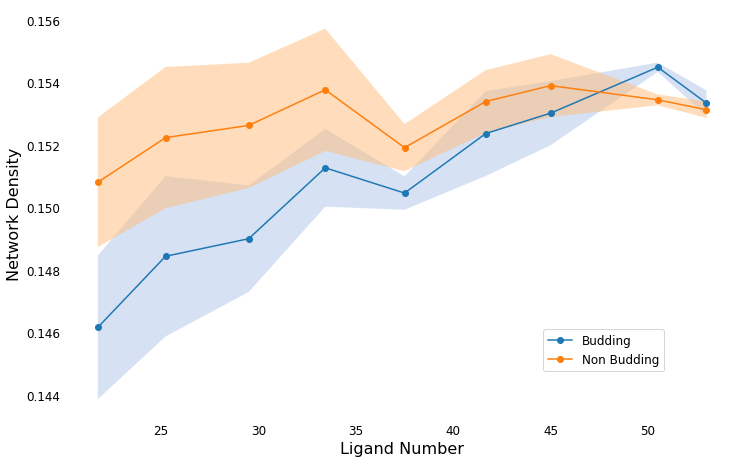

In [28]:
plt.figure(figsize=(12,7.5))
ax = plt.subplot(111)

r = [int(np.floor(min(budNets['Density'])*1000)), int(np.ceil(max(budNets['Density'])*1000)+1)]
# for y in range(r[0],r[1]):    
#     plt.plot(range(r[0],r[1]), [y] * len(range(r[0],r[1])), "--", lw=0.5, color="black", alpha=0.3)

xr = range(int(np.floor(min(budNets['Ligand Number']))-1), int(np.ceil(max(budNets['Ligand Number']))+2))

# for y in range(r[0],r[1]):    
#     plt.plot(xr, [y*0.001] * len(xr) , "--", lw=0.5, color="black", alpha=0.3)    
 
    
r = buildBinnedPlot("Density")

plt.errorbar(binnedLigandNum,r[0],fmt='-o',label="Budding")
plt.errorbar(binnedNonBudLigandNum,r[3],fmt='-o',label="Non Budding")

yerrbud1 = [e[0]-e[1] for e in  zip(r[0],r[2])]
yerrbud2 = [e[0]+e[1] for e in  zip(r[0],r[2])]

yerrnobud1 = [e[0]-e[1] for e in  zip(r[3],r[5])]
yerrnobud2 = [e[0]+e[1] for e in  zip(r[3],r[5])]

ax.fill_between(binnedLigandNum,yerrbud1, yerrbud2, where=yerrbud2 >= yerrbud1, facecolor=tab20[1], interpolate=True,alpha=0.5)
ax.fill_between(binnedLigandNum,yerrnobud1, yerrnobud2, where=yerrnobud2 >= yerrnobud1, facecolor=tab20[3], interpolate=True,alpha=0.5)

    
# plt.plot(budNets["Ligand Number"],budNets['Density'],'.',label='_nolegend_',alpha=0.5,color=plt.get_cmap('tab20')(3))
# plt.plot(nonbudNets["Ligand Number"],nonbudNets['Density'],'.',label='_nolegend_',alpha=0.5,color=plt.get_cmap('tab20')(1))
# plt.plot(meanBudNets["Ligand Number"],meanBudNets['Density'],'s',label="Budding",color=plt.get_cmap('tab20')(2))
# plt.plot(meanNonbudNets["Ligand Number"],meanNonbudNets['Density'],'s',label="Non Budding",alpha=0.5,color=plt.get_cmap('tab20')(0))
plt.ylabel("Network Density",fontsize=16)
plt.xlabel("Ligand Number",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  
plt.legend(loc='lower right',fontsize=12,bbox_to_anchor=(0.9, 0.1))
plt.savefig('/Users/joel/Projects/Figures/Density-LigandNumber.eps', format='eps', dpi=1000)
plt.savefig('/Users/joel/Projects/Figures/Density-LigandNumber.png')
plt.show()

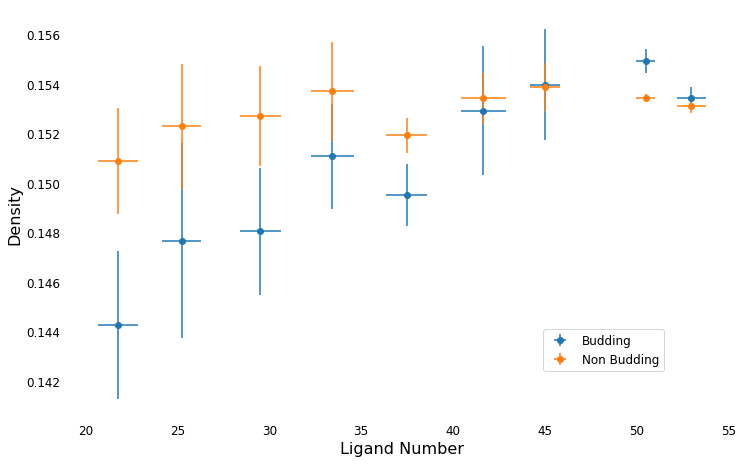

In [146]:
bigFig("Density")

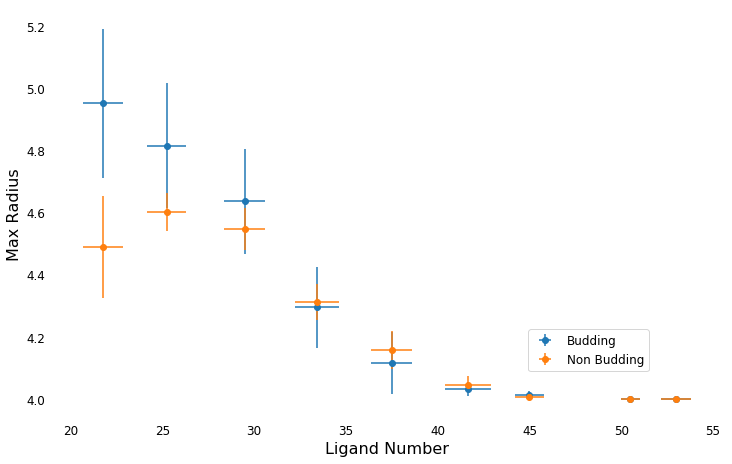

In [147]:
bigFig("Max Radius")

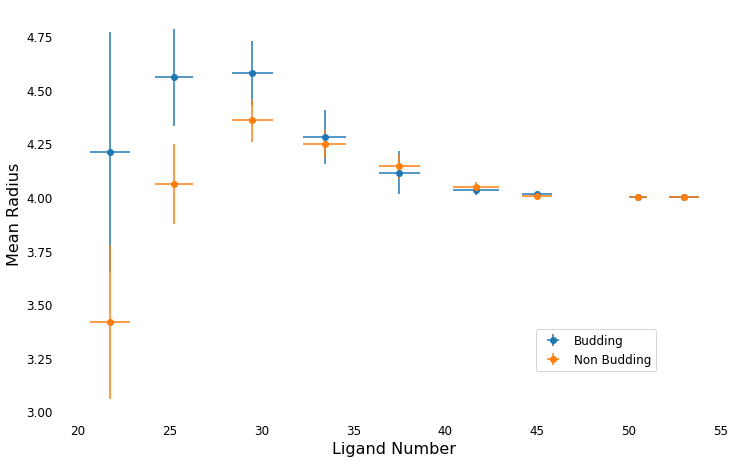

In [148]:
bigFig("Mean Radius")

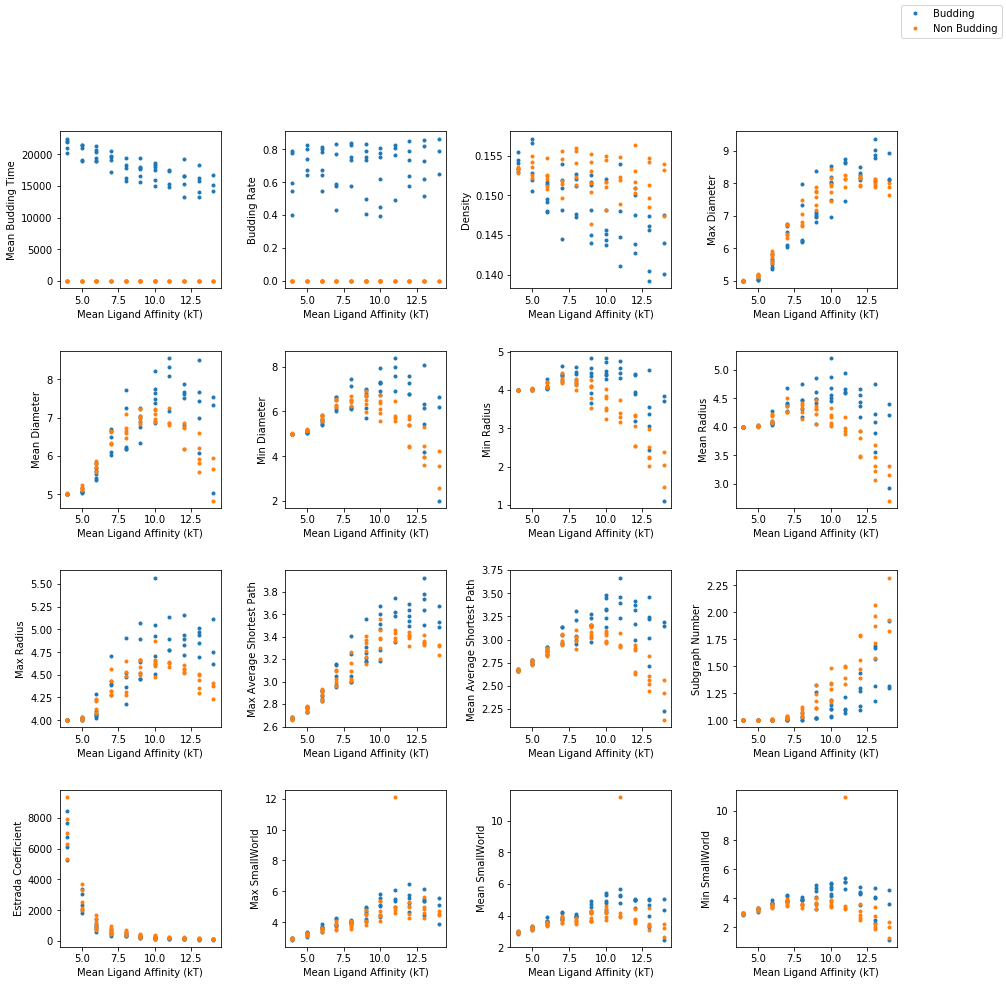

In [14]:
i = 1


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(4, 4, i)
    ax.plot(budNets['Mean Affinity'],budNets[c],'.',label="Budding")
    ax.plot(nonbudNets['Mean Affinity'],nonbudNets[c],'.',label="Non Budding")
    plt.ylabel(c)
    plt.xlabel("Mean Ligand Affinity (kT)")
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

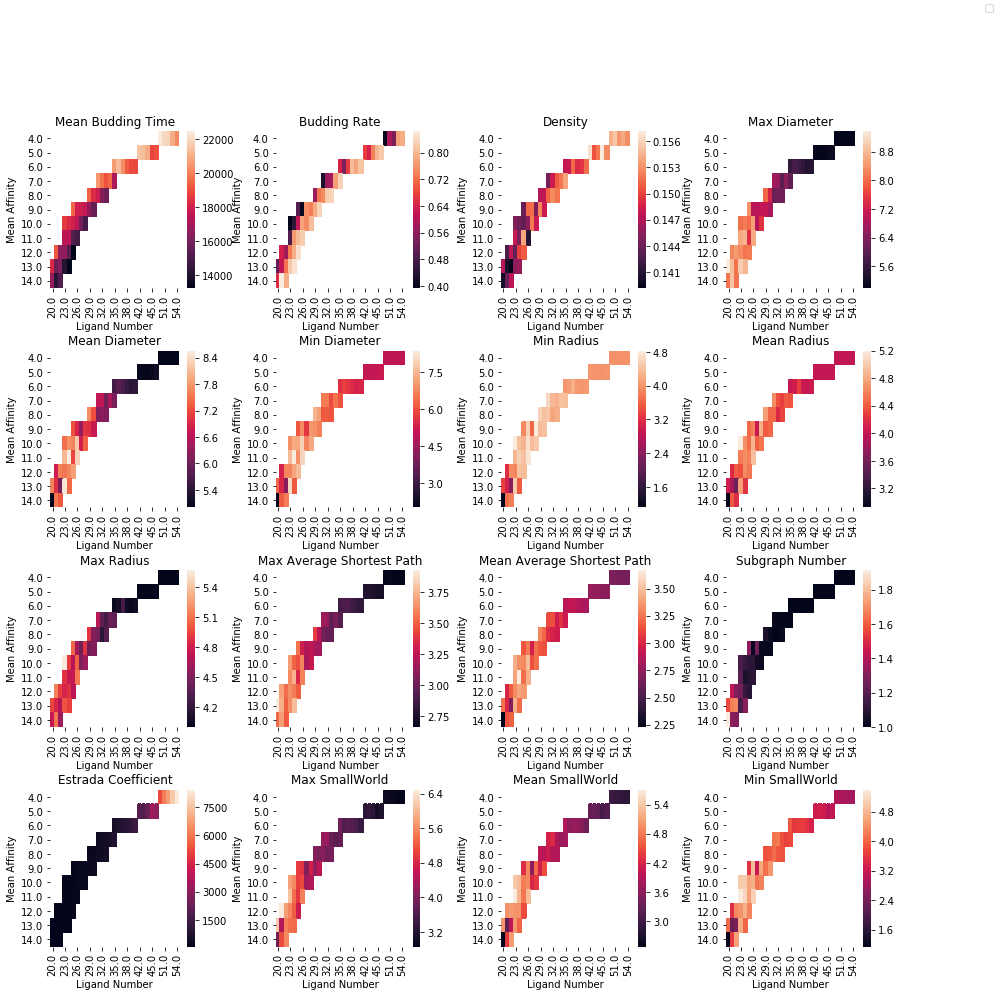

In [15]:
i = 1
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(4, 4, i)
    budNetsT = budNets.pivot("Mean Affinity", "Ligand Number", c)
    ax = sns.heatmap(budNetsT)
    ax.set_title(c)
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

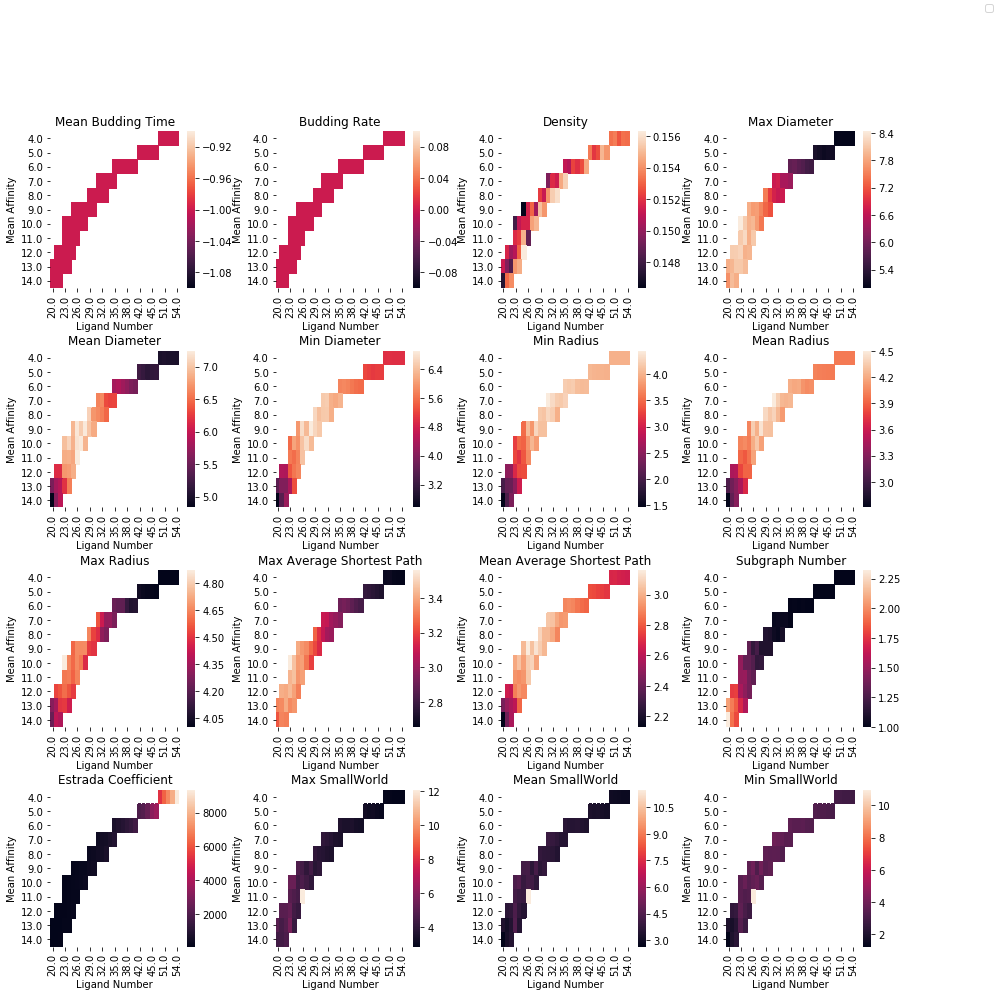

In [16]:
i = 1
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(4, 4, i)
    nonbudNetsT = nonbudNets.pivot("Mean Affinity", "Ligand Number", c)
    ax.set_title(c)
    ax = sns.heatmap(nonbudNetsT)
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

In [109]:
bins = np.linspace(0, 100, 26)
print bins

digitisedLigandNum = np.digitize(meanBudNets["Ligand Number"], bins)
binnedLigandNum = [meanBudNets["Ligand Number"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]
binnedNonBudLigandNum = [meanNonbudNets["Ligand Number"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]
binnedBuddingRate = [meanBudNets["Budding Rate"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]

binnedLigandNum = [b for b in binnedLigandNum if not np.isnan(b)]
binnedNonBudLigandNum = [b for b in binnedNonBudLigandNum if not np.isnan(b)]
binnedBuddingRate = [b for b in binnedBuddingRate if not np.isnan(b)]


[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100.]


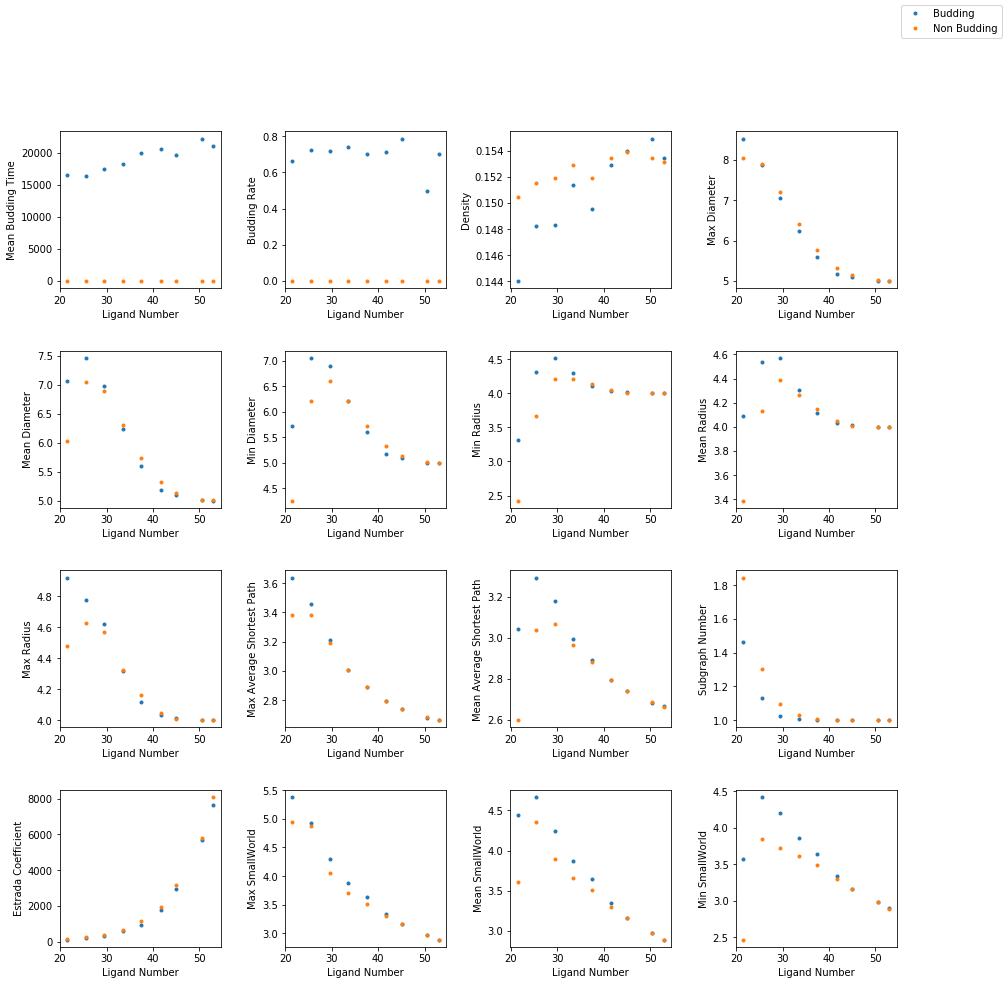

In [110]:
i = 1
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in meanBudNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(4, 4, i)
    binnedBudC = [meanBudNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
    binnedBudC = [b for b in binnedBudC if not np.isnan(b)]
    binnedNoBudC = [meanNonbudNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
    binnedNoBudC = [b for b in binnedNoBudC if not np.isnan(b)]
    ax.plot(binnedLigandNum,binnedBudC,'.',label="Budding")
    ax.plot(binnedNonBudLigandNum,binnedNoBudC,'.',label="Non Budding")
    plt.ylabel(c)
    plt.xlabel("Ligand Number")
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

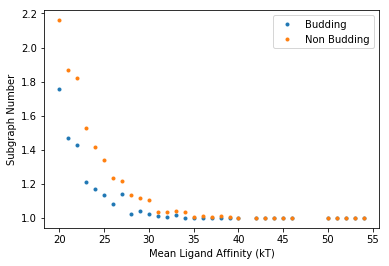

In [20]:
c = 'Subgraph Number'
plt.plot(meanBudNets['Ligand Number'],meanBudNets[c],'.',label="Budding")
plt.plot(meanNonbudNets['Ligand Number'],meanNonbudNets[c],'.',label="Non Budding")
plt.ylabel(c)
plt.xlabel("Mean Ligand Affinity (kT)")
plt.legend()
plt.show()

In [21]:
budNets = criticalNets[criticalNets['Mean Budding Time'] > 0.0].groupby(['Mean Affinity']).mean().reset_index()
nonbudNets = criticalNets[criticalNets['Mean Budding Time'] < 0.0].groupby(['Mean Affinity']).mean().reset_index()

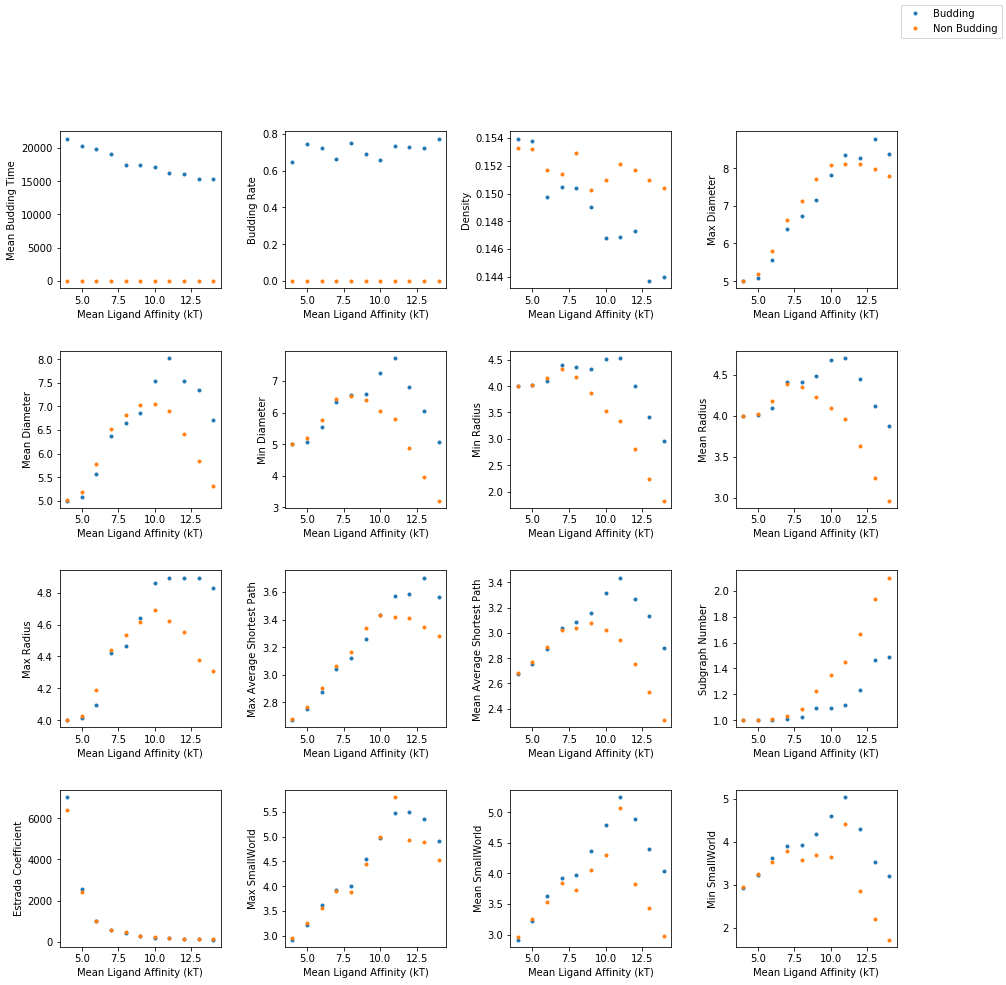

In [22]:
i = 1


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(4, 4, i)
    ax.plot(budNets['Mean Affinity'],budNets[c],'.',label="Budding")
    ax.plot(nonbudNets['Mean Affinity'],nonbudNets[c],'.',label="Non Budding")
    plt.ylabel(c)
    plt.xlabel("Mean Ligand Affinity (kT)")
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

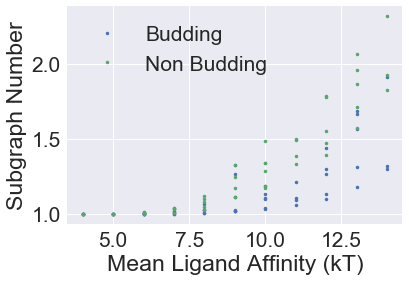

In [161]:
c = 'Subgraph Number'
plt.plot(budNets['Mean Affinity'],budNets[c],'.',label="Budding")
plt.plot(nonbudNets['Mean Affinity'],nonbudNets[c],'.',label="Non Budding")
plt.ylabel(c)
plt.xlabel("Mean Ligand Affinity (kT)")
plt.legend()
plt.show()

In [157]:
zoo_df = pd.read_csv('/Users/joel/Projects/golden/zoo.csv',names=['name','n','e','fitness','bud_rate','budtime'])

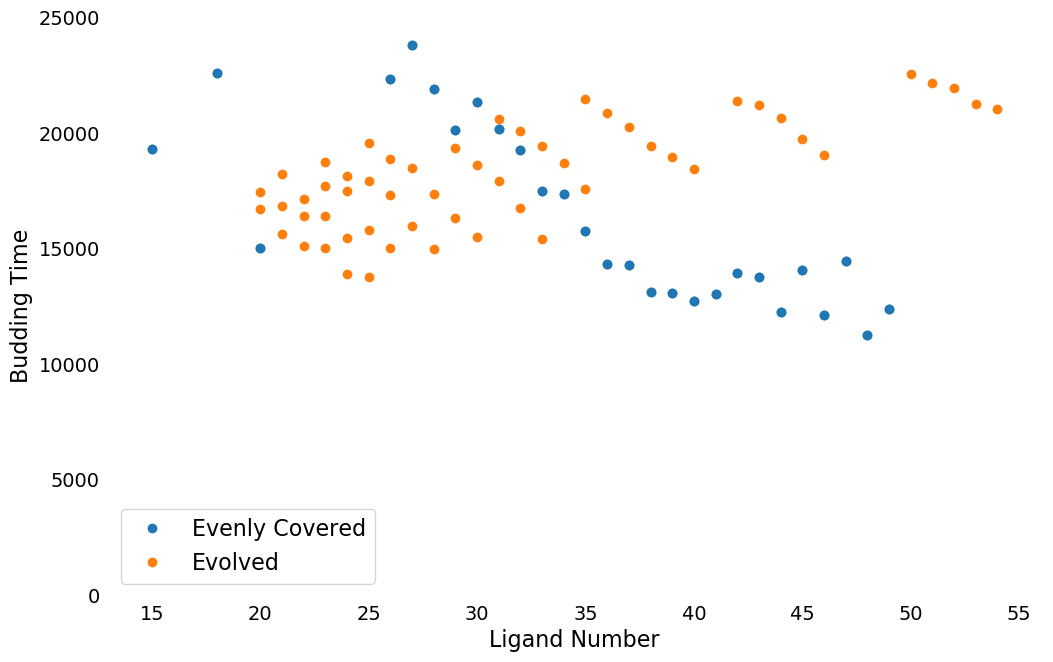

In [358]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')
plt.figure(figsize=(12,7.5))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on") 
plt.plot(zoo_df[zoo_df['budtime']>0]['n'],zoo_df[zoo_df['budtime']>0]['budtime'],'o',label="Evenly Covered")
plt.plot(budNets[budNets['Mean Budding Time']>0]['Ligand Number'],budNets[budNets['Mean Budding Time']>0]['Mean Budding Time'],'o',label="Evolved")
plt.ylabel('Budding Time',fontsize=16)
plt.xlabel("Ligand Number",fontsize=16)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
plt.ylim(0,25000)
plt.legend(fontsize=16)
plt.show()

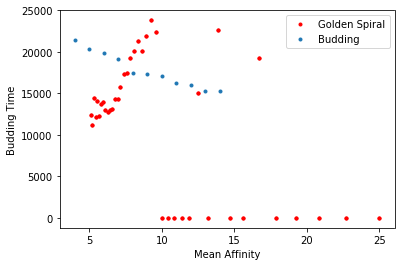

In [26]:
plt.plot(zoo_df['e'],zoo_df['budtime'],'.',label="Golden Spiral",color="red")
plt.plot(budNets['Mean Affinity'],budNets['Mean Budding Time'],'.',label="Budding")
plt.ylabel('Budding Time')
plt.xlabel("Mean Affinity")
plt.legend()
plt.show()

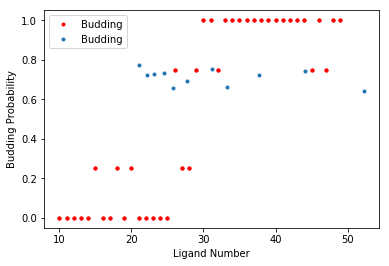

In [27]:
plt.plot(zoo_df['n'],zoo_df['bud_rate'],'.',label="Budding",color="red")
plt.plot(budNets['Ligand Number'],budNets['Budding Rate'],'.',label="Budding")
plt.ylabel('Budding Probability')
plt.xlabel("Ligand Number")
plt.legend()
plt.show()

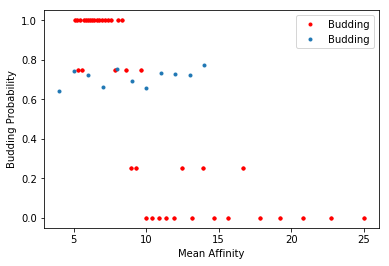

In [28]:
plt.plot(zoo_df['e'],zoo_df['bud_rate'],'.',label="Budding",color="red")
plt.plot(budNets['Mean Affinity'],budNets['Budding Rate'],'.',label="Budding")
plt.ylabel('Budding Probability')
plt.xlabel("Mean Affinity")
plt.legend()
plt.show()

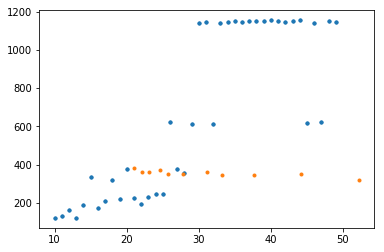

In [29]:
plt.plot(zoo_df['n'],zoo_df['fitness'],'.',label="Budding")
plt.plot(budNets['Ligand Number'],budNets['Fitness'],'.',label="Budding")

In [344]:
net_df[(net_df['Ligand Number']==23) & (net_df['Mean Affinity']==10)].sort_values("Subgraph Number")

,Ligand Number,Mean Affinity,Fitness,Mean Budding Time,Budding Rate,Density,Max Diameter,Mean Diameter,Min Diameter,Min Radius,...,Max Radius,Max Average Shortest Path,Mean Average Shortest Path,Min Average Shortest Path,Subgraph Number,Estrada Coefficient,Pruning,Max SmallWorld,Mean SmallWorld,Min SmallWorld
5760,23.0,10.0,205.000000,-1.0,0.00,0.146245,10.0,10.000000,10.0,5.0,...,5.0,3.806324,3.806324,3.806324,1.0,139.810574,0.3,3.887772,3.887772,3.887772
7104,23.0,10.0,232.250000,-1.0,0.00,0.154150,8.0,8.000000,8.0,5.0,...,5.0,3.375494,3.375494,3.375494,1.0,156.080020,0.3,4.211949,4.211949,4.211949
7105,23.0,10.0,135.750000,-1.0,0.00,0.162055,9.0,9.000000,9.0,5.0,...,5.0,3.529644,3.529644,3.529644,1.0,193.991719,0.3,4.147978,4.147978,4.147978
7110,23.0,10.0,185.250000,-1.0,0.00,0.150198,7.0,7.000000,7.0,5.0,...,5.0,3.324111,3.324111,3.324111,1.0,132.008741,0.3,5.835704,5.835704,5.835704
7111,23.0,10.0,214.500000,24900.0,0.00,0.154150,6.0,6.000000,6.0,4.0,...,4.0,3.039526,3.039526,3.039526,1.0,120.749134,0.3,3.267333,3.267333,3.267333
7116,23.0,10.0,227.500000,-1.0,0.00,0.158103,8.0,8.000000,8.0,4.0,...,4.0,3.169960,3.169960,3.169960,1.0,139.983621,0.3,3.748757,3.748757,3.748757
7117,23.0,10.0,217.500000,-1.0,0.00,0.150198,6.0,6.000000,6.0,5.0,...,5.0,3.213439,3.213439,3.213439,1.0,119.618723,0.3,8.678642,8.678642,8.678642
7131,23.0,10.0,193.750000,-1.0,0.00,0.146245,8.0,8.000000,8.0,5.0,...,5.0,3.529644,3.529644,3.529644,1.0,146.921251,0.3,5.095244,5.095244,5.095244
7150,23.0,10.0,86.500000,-1.0,0.00,0.142292,11.0,11.000000,11.0,6.0,...,6.0,4.739130,4.739130,4.739130,1.0,126.532884,0.3,3.623909,3.623909,3.623909
7154,23.0,10.0,182.750000,-1.0,0.00,0.166008,11.0,11.000000,11.0,6.0,...,6.0,3.810277,3.810277,3.810277,1.0,352.163603,0.3,6.344875,6.344875,6.344875


In [357]:

net_df[(net_df['Fitness']==158.750000)&(net_df['Ligand Number']==23) & (net_df['Mean Affinity']==10) ].sort_values(["Subgraph Number","Density"])



,Ligand Number,Mean Affinity,Fitness,Mean Budding Time,Budding Rate,Density,Max Diameter,Mean Diameter,Min Diameter,Min Radius,...,Max Radius,Max Average Shortest Path,Mean Average Shortest Path,Min Average Shortest Path,Subgraph Number,Estrada Coefficient,Pruning,Max SmallWorld,Mean SmallWorld,Min SmallWorld
7869,23.0,10.0,158.75,-1.0,0.0,0.162055,4.0,3.0,2.0,1.0,...,2.0,1.933333,1.57963,1.333333,3.0,218.644226,0.3,2.0275,1.185532,0.0


In [343]:
bud_df

,e,n,bud_number,size,bud_percentage,mean_budtime
0,20.0,4.0,0.0,2880.0,0.000000,-1.000000
1,20.0,5.0,0.0,2880.0,0.000000,-1.000000
2,20.0,6.0,0.0,2880.0,0.000000,-1.000000
3,20.0,7.0,0.0,2880.0,0.000000,-1.000000
4,20.0,8.0,0.0,2880.0,0.000000,-1.000000
5,20.0,9.0,0.0,2880.0,0.000000,-1.000000
6,20.0,11.0,205.0,2880.0,0.017795,22143.536585
7,20.0,12.0,1400.0,2880.0,0.184549,21427.216667
8,20.0,13.0,1806.0,2880.0,0.323003,18296.849022
9,20.0,14.0,2258.0,2880.0,0.511024,16715.756422


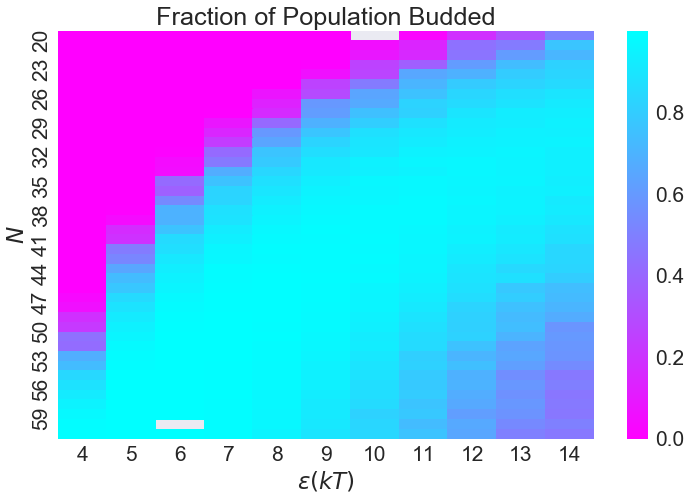

In [147]:
plt.figure(figsize=(12,7.5))
result = bud_df.pivot(index='e', columns='n', values='bud_percentage')
sns.heatmap(result,cmap='cool_r')
plt.title('Fraction of Population Budded')
plt.xlabel("$\epsilon (kT)$")
plt.ylabel("$N$")
sns.set(font_scale=2.1)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on") 
    
plt.show()

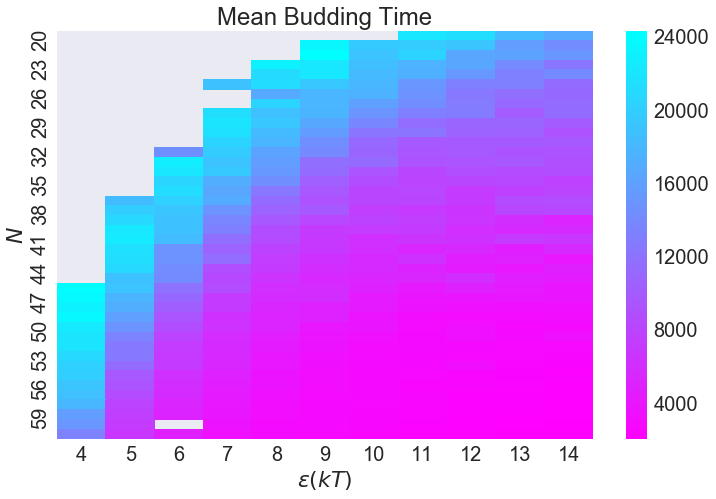

In [146]:
plt.figure(figsize=(12,7.5))
result = bud_df[bud_df['mean_budtime']>0].pivot(index='e', columns='n', values='mean_budtime')
sns.heatmap(result,cmap='cool_r')
plt.title('Mean Budding Time')
plt.xlabel("$\epsilon (kT)$")
plt.ylabel("$N$")
sns.set(font_scale=2.1)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on") 
    
plt.show()

In [209]:
import random
for c in criticalNets:
    print c

Ligand Number
Mean Affinity
Fitness
Mean Budding Time
Budding Rate
Density
Max Diameter
Mean Diameter
Min Diameter
Min Radius
Mean Radius
Max Radius
Max Average Shortest Path
Mean Average Shortest Path
Min Average Shortest Path
Subgraph Number
Estrada Coefficient
Pruning
Max SmallWorld
Mean SmallWorld
Min SmallWorld


In [37]:
spec_df = pd.read_csv('/Users/joelforster/Projects/optihedron/opti-spectrum.csv')

In [38]:
spec_df.columns

Index([u'id', u'e', u'n', u'fitness', u'budtime', u'budfrac', u'mean_dist',
       u'spectrum'],
      dtype='object')

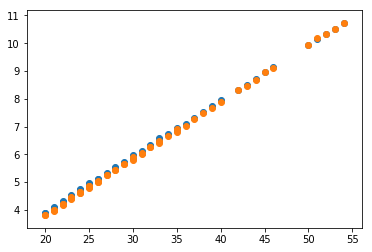

In [53]:
cR = [[20, 13], [20, 14], [21, 12], [21, 13], [21, 14], [22, 12], [22, 13], [22, 14], [23, 10], [23, 11], [23, 12], [23, 13], [24, 10], [24, 11], [24, 12], [24, 13], [25, 9], [25, 10], [25, 11], [25, 12], [26, 9], [26, 10], [26, 11], [27, 9], [27, 10], [28, 9], [28, 10], [29, 8], [29, 9], [30, 8], [30, 9], [31, 7], [31, 8], [32, 7], [32, 8], [33, 7], [33, 8], [34, 7], [35, 6], [35, 7], [36, 6], [37, 6], [38, 6], [39, 6], [40, 6], [42, 5], [43, 5], [44, 5], [45, 5], [46, 5], [50, 4], [51, 4], [52, 4], [53, 4], [54, 4]]

bRadMean = []
nRadMean = []

for c in cR:
    s = spec_df[(spec_df['e']==float(c[-1])) & (spec_df['n']==float(c[0]))]
    bspec = []
    nspec = []
    brad = []
    nrad = []
    for spec in s[s['budtime']>-1]['spectrum'].values.tolist():
        speclist = [float(eig) for eig in spec[1:len(spec)-1].split(',')]
        bspec.append(speclist)
        brad.append(max(speclist))
    for spec in s[s['budtime']<0]['spectrum'].values.tolist():
        speclist = [float(eig) for eig in spec[1:len(spec)-1].split(',')]
        nspec.append(speclist)
        nrad.append(max(speclist))
#     sns.distplot(nrad,bins=np.linspace(min(nrad),max(nrad),40),kde=False,norm_hist=True)
#     sns.distplot(brad,bins=np.linspace(min(brad),max(brad),40),kde=False,norm_hist=True)
    bRadMean.append([c[0],c[1],np.mean(brad)])
    nRadMean.append([c[0],c[1],np.mean(nrad)])
plt.scatter([i[0] for i in nRadMean],[i[2] for i in nRadMean])
plt.scatter([i[0] for i in bRadMean],[i[2] for i in bRadMean])

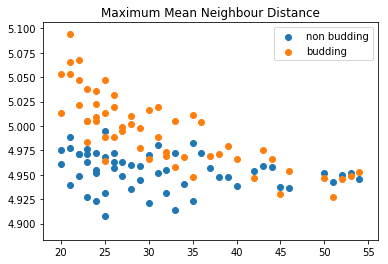

In [73]:
nDistMean = []
bDistMean = []
nDistMin = []
bDistMin = []
nDistMax = []
bDistMax = []
for c in cR:
    s = spec_df[(spec_df['e']==float(c[-1])) & (spec_df['n']==float(c[0]))]
    bdist = []
    ndist = []
    for dist in s[s['budtime']>-1]['mean_dist'].values.tolist():
        fdist = float(dist)
        bdist.append(fdist)
    for dist in s[s['budtime']<0]['mean_dist'].values.tolist():
        fdist = float(dist)
        ndist.append(fdist)
    nDistMean.append([c[0],c[1],1.0/np.mean(ndist)])
    bDistMean.append([c[0],c[1],1.0/np.mean(bdist)])
    nDistMin.append([c[0],c[1],1.0/np.min(ndist)])
    bDistMin.append([c[0],c[1],1.0/np.min(bdist)])
    nDistMax.append([c[0],c[1],1.0/np.max(ndist)])
    bDistMax.append([c[0],c[1],1.0/np.max(bdist)])

# sns.distplot(ndist,bins=np.linspace(min(ndist),max(ndist),40),kde=False,norm_hist=True)
# sns.distplot(bdist,bins=np.linspace(min(bdist),max(bdist),40),kde=False,norm_hist=True)

plt.scatter([i[0] for i in nDistMean],[i[2] for i in nDistMean],label='non budding')
plt.scatter([i[0] for i in bDistMean],[i[2] for i in bDistMean],label='budding')
plt.title('Maximum Mean Neighbour Distance')
plt.legend()
plt.show()

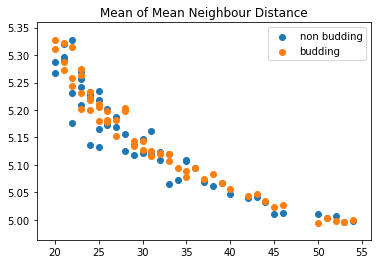

In [72]:
plt.scatter([i[0] for i in nDistMin],[i[2] for i in nDistMin],label='non budding')
plt.scatter([i[0] for i in bDistMin],[i[2] for i in bDistMin],label='budding')
plt.title('Mean of Mean Neighbour Distance')
plt.legend()
plt.show()

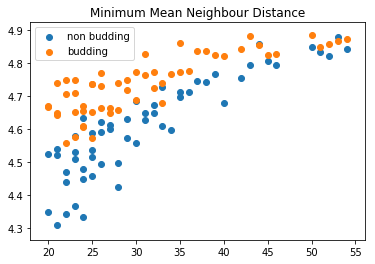

In [71]:
plt.scatter([i[0] for i in nDistMax],[i[2] for i in nDistMax],label='non budding')
plt.scatter([i[0] for i in bDistMax],[i[2] for i in bDistMax],label='budding')
plt.title('Minimum Mean Neighbour Distance')
plt.legend()
plt.show()